### Try this notebook in Google Colab, Binder or SageMaker!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/PointSet.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitk%2FPointSet.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/PointSet.ipynb)

In [1]:
import sys, os

!{sys.executable} -m pip install -q tqdm pooch "itk>=5.3.0" "itkwidgets[all]>=1.0a23"

In [2]:
import itk
import pooch
import numpy as np
from itkwidgets import view

In [3]:
# Download data
files = pooch.retrieve(
    url='https://bafybeidii6e4zhuswkhw7tm3dalmfw5yt4mja5yf3gb7t4jur3rdgdecve.ipfs.w3s.link/ipfs/bafybeidii6e4zhuswkhw7tm3dalmfw5yt4mja5yf3gb7t4jur3rdgdecve/DeformAVolumeWithAThinPlateSpline.zip',
    known_hash='sha256:d267f9216d11c3f953b3a2601f38d1434ab97c17834dca0ad1b3ff558226c9c1',
    processor=pooch.Unzip(), path="./", fname="ThinPlateSpline", progressbar=True)
file_path = os.path.commonpath(files)

In [4]:
source_landmarks = os.path.join(file_path, "SourceLandmarks.vtk")
target_landmarks = os.path.join(file_path, "TargetLandmarks.vtk")
input_image = os.path.join(file_path, "brainweb165a10f17.mha")

In [5]:
Dimension = 3
thin_plate_spline = itk.ThinPlateSplineKernelTransform[itk.D, Dimension].New()

In [6]:
source_landmarks_mesh = itk.meshread(source_landmarks)
# Cast points from float32 to float64
points = itk.array_from_vector_container(source_landmarks_mesh.GetPoints())
points = points.astype(np.float64)
source_landmarks = thin_plate_spline.GetSourceLandmarks()
source_landmarks.SetPoints(itk.vector_container_from_array(points.flatten()))

In [7]:
target_landmarks_mesh = itk.meshread(target_landmarks)
# Cast points from float32 to float64
points = itk.array_from_vector_container(target_landmarks_mesh.GetPoints())
points = points.astype(np.float64)
target_landmarks = thin_plate_spline.GetTargetLandmarks()
target_landmarks.SetPoints(itk.vector_container_from_array(points.flatten()))

In [8]:
thin_plate_spline.ComputeWMatrix()

input_image = itk.imread(input_image)

In [9]:
deformed = itk.resample_image_filter(
    input_image,
    use_reference_image=True,
    reference_image=input_image,
    transform=thin_plate_spline,
)


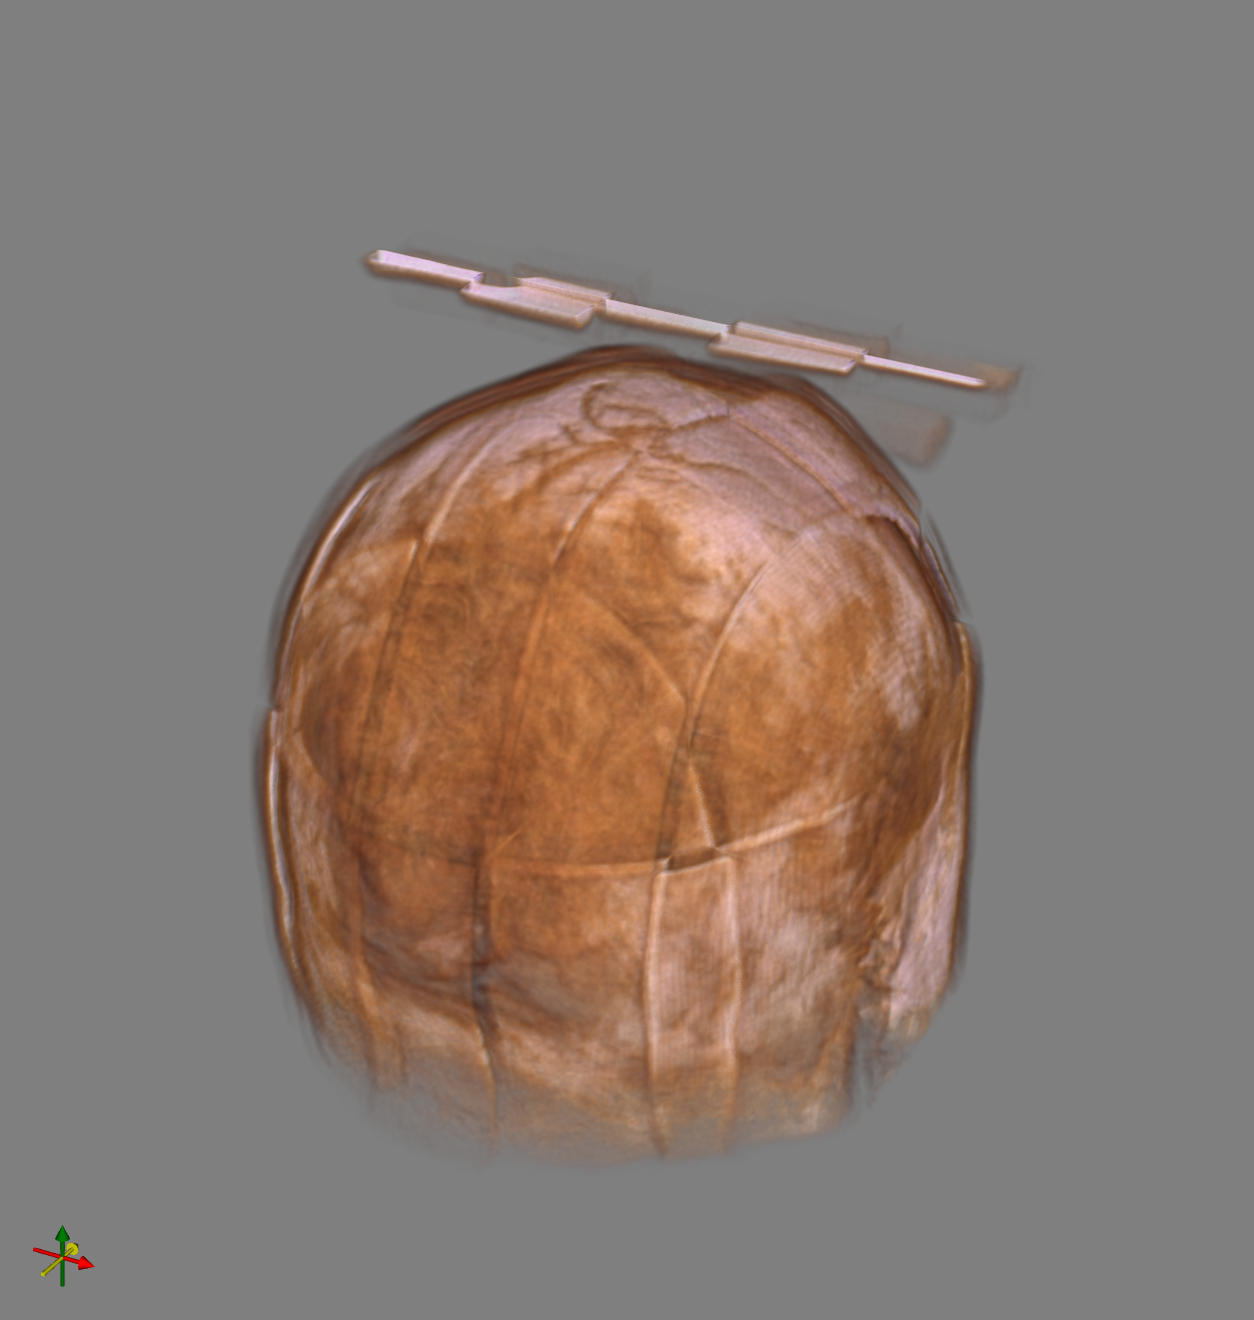
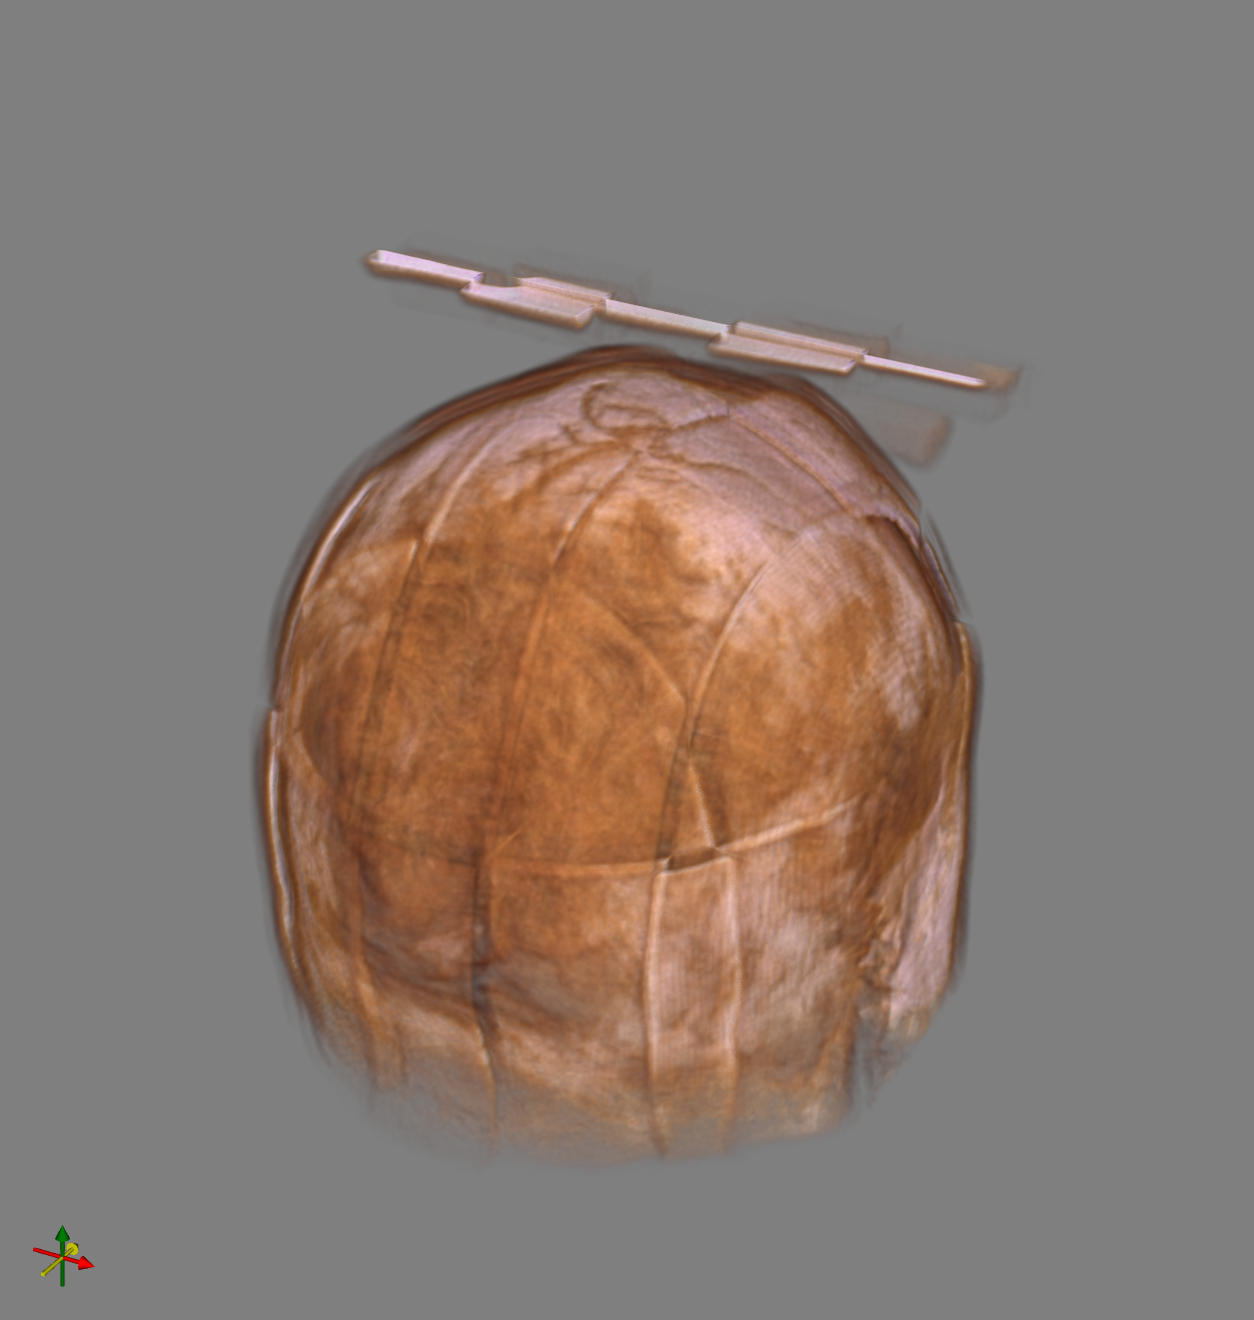

<IPython.core.display.Javascript object>

In [10]:
viewer = view(image=input_image, ui='reference')

In [11]:
viewer.set_image(deformed, 'deformed')

In [12]:
viewer.compare_images('Image', 'deformed', {'method': 'checkerboard', 'pattern': [5, 5, 2], 'swapImageOrder': False})